In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 36s 0us/step 


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

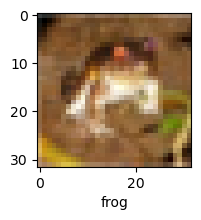

In [12]:
plot_sample(X_train, y_train, 0)

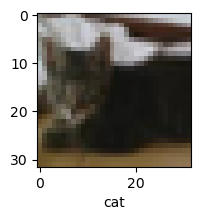

In [13]:
plot_sample(X_train, y_train, 9)

## Normalizing the training data

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## ANN

In [17]:
ann = models.Sequential([
        layers.Input(shape=(32,32,3)),
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.3568 - loss: 1.8108 
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.4273 - loss: 1.6227 
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.4562 - loss: 1.5412 
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.4789 - loss: 1.4813 
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.4970 - loss: 1.4318 


In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.56      0.56      1000
           1       0.51      0.73      0.60      1000
           2       0.49      0.13      0.21      1000
           3       0.33      0.43      0.38      1000
           4       0.39      0.44      0.41      1000
           5       0.55      0.17      0.26      1000
           6       0.48      0.60      0.54      1000
           7       0.42      0.67      0.52      1000
           8       0.70      0.41      0.52      1000
           9       0.51      0.58      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



## CNN

In [34]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
cnn = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.4839 - loss: 1.4383 
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6192 - loss: 1.0858
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6653 - loss: 0.9614
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6965 - loss: 0.8744
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7183 - loss: 0.8085


In [24]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6919 - loss: 0.9072   


[0.9072040915489197, 0.6919000148773193]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


array([[3.9276571e-04, 5.2052259e-05, 1.1634739e-03, 8.9803600e-01,
        4.8068789e-04, 6.2647648e-02, 1.0703475e-02, 8.4520507e-05,
        2.6180429e-02, 2.5892293e-04],
       [1.3631784e-02, 7.8301251e-02, 1.2214143e-05, 4.5640841e-06,
        6.7743042e-07, 1.0190322e-07, 7.2186232e-08, 4.3387949e-08,
        9.0681779e-01, 1.2314403e-03],
       [7.7308662e-02, 7.8521751e-02, 3.0900422e-03, 1.0672516e-02,
        1.5717894e-03, 3.3028523e-04, 6.5159076e-04, 7.7287422e-04,
        8.2450849e-01, 2.5720212e-03],
       [8.1734627e-01, 3.5710239e-03, 1.7198445e-02, 2.2413000e-03,
        7.8992983e-03, 1.3651003e-04, 4.2808810e-04, 4.6219938e-03,
        1.4550634e-01, 1.0507387e-03],
       [7.9661750e-06, 8.0402220e-05, 4.8993775e-03, 1.1810185e-02,
        9.6096747e-02, 2.0902415e-03, 8.8496530e-01, 7.9147421e-06,
        4.0951669e-05, 1.0107245e-06]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

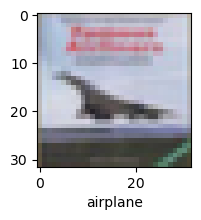

In [28]:
plot_sample(X_test, y_test,3)

In [29]:
classes[y_classes[3]]

'airplane'

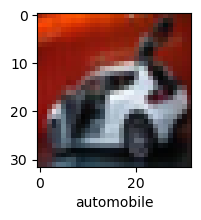

In [30]:
plot_sample(X_test, y_test,6)

In [31]:
classes[y_classes[6]]

'automobile'

In [33]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      1000
           1       0.83      0.79      0.81      1000
           2       0.59      0.58      0.59      1000
           3       0.54      0.47      0.50      1000
           4       0.68      0.54      0.60      1000
           5       0.58      0.61      0.60      1000
           6       0.70      0.83      0.76      1000
           7       0.73      0.76      0.74      1000
           8       0.82      0.79      0.80      1000
           9       0.75      0.81      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

